In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
x_train = train[['Pclass', 'Sex', 'Age', 'SibSp','Parch', 'Fare', 'Embarked']]
y_train = train['Survived'].values

In [4]:
x_test = test[['Pclass', 'Sex', 'Age', 'SibSp','Parch', 'Fare', 'Embarked']]

In [5]:
print (train.shape)

(891, 12)


In [6]:
age_fill = [x_train['Age'].median(), x_test['Age'].median()]
x_train['Age'].fillna(age_fill[0], inplace=True)
x_test['Age'].fillna(age_fill[1], inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [7]:
combined = x_train.append(x_test)

          female  male
Survived     233   109
Dead          81   468


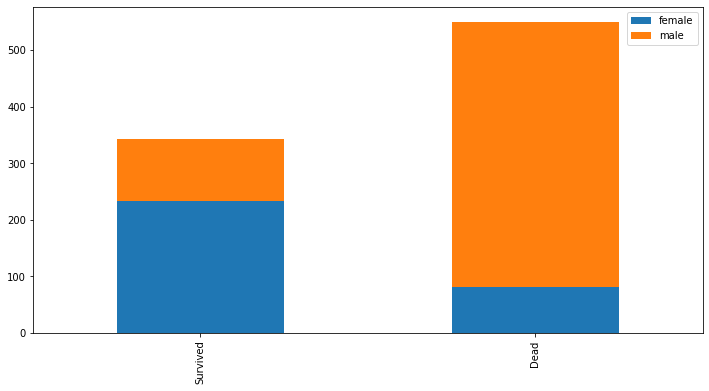

In [8]:
survived_peeps = x_train[train['Survived']==1]['Sex'].value_counts()
dead_peeps = x_train[train['Survived']==0]['Sex'].value_counts()
df = pd.DataFrame([survived_peeps,dead_peeps])
df.index = ['Survived','Dead']
print(df)
df.plot(kind='bar',stacked=True, figsize=(12,6))

In [9]:
fixSex = combined['Sex'].copy().values
fixSex[fixSex == 'male'] = 0
fixSex[fixSex == 'female'] = 1 
fixSex.shape

(1309,)

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:723: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


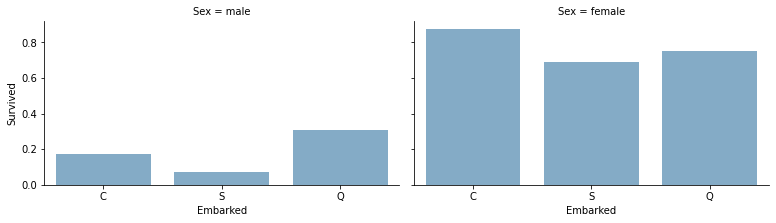

In [10]:
grid = sns.FacetGrid(train, col ='Sex', size = 3.2, aspect =1.7)
grid.map(sns.barplot, 'Embarked','Survived', alpha= 0.6, ci = None)

In [11]:
combined['Embarked'].fillna(combined['Embarked'].mode()[0], inplace=True) 
fixEmb = combined['Embarked'].copy().values

In [12]:
fixEmb[fixEmb =='S'] = 0 
fixEmb[fixEmb =='C'] = 1
fixEmb[fixEmb =='Q'] = 2
fixEmb.shape

(1309,)

In [13]:
combined['Fare'].fillna(combined['Fare'].median(), inplace=True)

In [14]:
allnum_train = combined.copy()
allnum_train.loc[:,'Sex'] = fixSex 
allnum_train.loc[:,'Embarked'] = fixEmb
allnum_train.head(15)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.0,1,0,7.2500,0
1,1,1,38.0,1,0,71.2833,1
2,3,1,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,3,0,35.0,0,0,8.0500,0
5,3,0,28.0,0,0,8.4583,2
6,1,0,54.0,0,0,51.8625,0
7,3,0,2.0,3,1,21.0750,0
8,3,1,27.0,0,2,11.1333,0
9,2,1,14.0,1,0,30.0708,1


In [15]:
x = allnum_train.copy()[:891]
x_test=  allnum_train.copy()[891:]

In [16]:
from sklearn.model_selection import train_test_split
XtrainV, XtestV, ytrainV, ytestV = train_test_split(x,y_train, test_size = 0.30)

In [17]:
from sklearn import svm
classifier = svm.SVC()
classifier

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [18]:
classifier.fit(XtrainV, ytrainV)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [19]:
y_pred = classifier.predict(XtestV)

In [20]:
from sklearn import metrics
metrics.accuracy_score(ytestV, y_pred)

0.746268656716418

In [21]:
classifier.fit(x, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [22]:
classifier.score(x, y_train)

0.6823793490460157

In [23]:
target_sv = classifier.predict(x_test)

In [25]:
my_titanic_submission = pd.DataFrame({'PassengerId':test['PassengerId'].values, 'Survived': target_sv})
my_titanic_submission.to_csv('my_titanic_submission.csv', index=False)